In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv(r"C:\Users\user\Desktop\Python-Projects-master\Machiine Learning\9Outlier_removing_using_ZSCORE\placement.csv")

In [9]:
df.sample(4)

,cgpa,placement_exam_marks,placed
789,6.46,74.0,0
766,7.17,34.0,0
65,6.27,28.0,1
950,6.65,33.0,1


In [10]:
df.isnull().sum()

cgpa                    0
placement_exam_marks    0
placed                  0
dtype: int64

In [27]:
df.shape

(1000, 4)

In [11]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


<Axes: xlabel='placement_exam_marks'>

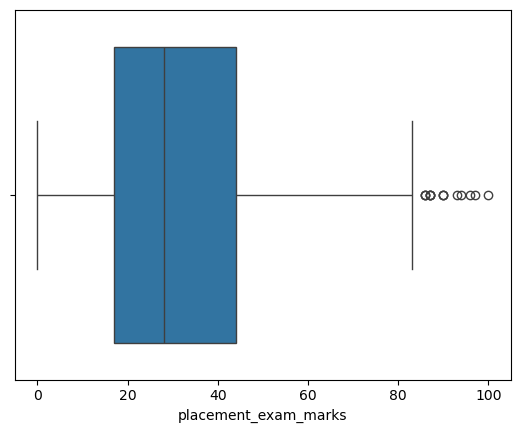

In [14]:
sns.boxplot(x = "placement_exam_marks" , data=df)

C:\Users\user\AppData\Local\Temp\ipykernel_6100\2067639411.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["placement_exam_marks"])


<Axes: xlabel='placement_exam_marks', ylabel='Density'>

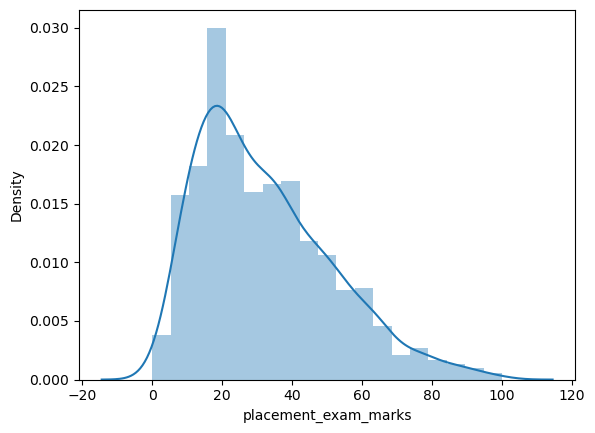

In [15]:
sns.distplot(df["placement_exam_marks"])

In [16]:
min_range = df["placement_exam_marks"].mean() - (3*df["placement_exam_marks"].std())
max_range = df["placement_exam_marks"].mean() + (3*df["placement_exam_marks"].std())

In [17]:
min_range , max_range

(-25.167467016763247, 89.61746701676324)

In [18]:
new_df = df[df["placement_exam_marks"] <= max_range]

<Axes: xlabel='placement_exam_marks'>

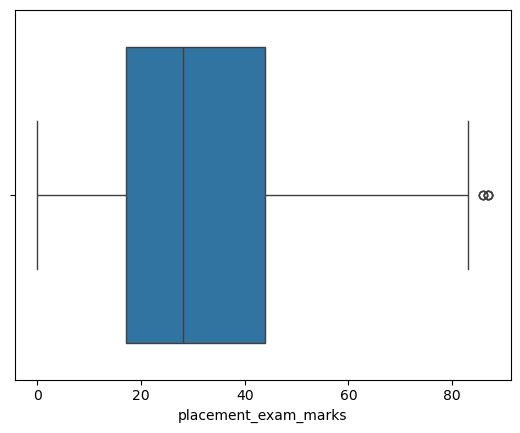

In [19]:
sns.boxplot(x = "placement_exam_marks" , data=new_df)

In [20]:
z_score = (df["placement_exam_marks"] - df["placement_exam_marks"].mean()) / (df["placement_exam_marks"]).std()

In [21]:
z_score

0     -0.325391
1      0.301869
2      0.406412
3     -1.266281
4     -0.795836
         ...   
995    0.615499
996    1.713204
997    0.092782
998    0.720042
999   -1.161738
Name: placement_exam_marks, Length: 1000, dtype: float64

In [24]:
df["z_score"] = z_score
df

,cgpa,placement_exam_marks,placed,z_score
0,7.19,26.0,1,-0.325391
1,7.46,38.0,1,0.301869
2,7.54,40.0,1,0.406412
3,6.42,8.0,1,-1.266281
4,7.23,17.0,0,-0.795836
...,...,...,...,...
995,8.87,44.0,1,0.615499
996,9.12,65.0,1,1.713204
997,4.89,34.0,0,0.092782
998,8.62,46.0,1,0.720042


In [26]:
df[df["z_score"] < 3]

,cgpa,placement_exam_marks,placed,z_score
0,7.19,26.0,1,-0.325391
1,7.46,38.0,1,0.301869
2,7.54,40.0,1,0.406412
3,6.42,8.0,1,-1.266281
4,7.23,17.0,0,-0.795836
...,...,...,...,...
995,8.87,44.0,1,0.615499
996,9.12,65.0,1,1.713204
997,4.89,34.0,0,0.092782
998,8.62,46.0,1,0.720042
